In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from scipy.stats import pearsonr

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

numpy   1.19.5
seaborn 0.10.1
pandas  1.1.4



In [3]:
import plot_utils as pu
clf_name = "rf_feature_selection_et"

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
from glob import glob

import joblib

clf_model = joblib.load("../data/clf.sklearn.all.rf_feature_selection_et.pkl")
clf_log = joblib.load("../data/clf.logistic.all.rf_feature_selection_et.pkl")

In [5]:
X_train, y_train, X_test, y_test = joblib.load("../data/data.pkl")

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# X_transf = clf['variancethreshold'].transform(X_test)

# X_transf = pd.DataFrame(X_transf, columns=[X_test.columns[i] for i in range(len(X_test.columns)) if clf['variancethreshold'].get_support()[i]])

In [7]:
# X_transf.shape

In [8]:
# X_transf = pd.DataFrame(clf['zerocount'].transform(X_test), columns=["num_zeroes", "num_nonzeroes"] + list(X_test.columns))

In [9]:
X_transf = pd.DataFrame(clf_model['rfecv'].transform(X_test), columns=[X_test.columns[i] for i in range(len(X_test.columns)) if clf_model['rfecv'].get_support()[i]])

In [10]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(clf_model["extratreesclassifier"])

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
pred = clf_model["extratreesclassifier"].predict_proba(X_transf)[:, 0]

In [ ]:
# np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

In [13]:
shap_values = explainer.shap_values(X_transf)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [14]:
shap_values

[array([[-3.99358569e-01, -7.49500122e-02, -8.33770223e-02, ...,
         -2.32553719e-03, -9.96980050e-04, -9.08608740e-03],
        [ 1.63020342e-02,  4.49779951e-04,  4.95933632e-03, ...,
         -2.61119917e-04, -1.97389980e-04,  1.23455883e-03],
        [ 5.78210388e-02,  6.03939278e-03,  4.23481045e-03, ...,
         -1.88968323e-03, -7.95924303e-04,  2.90299393e-03],
        ...,
        [ 1.84745629e-02,  3.27352334e-03,  4.99538816e-03, ...,
         -2.15765295e-04, -1.20842730e-04, -1.27517877e-03],
        [ 1.79105165e-02,  2.92764231e-03,  5.04752165e-03, ...,
         -2.80812640e-04, -1.33327378e-04, -3.99486977e-04],
        [ 1.83582616e-02,  3.07874541e-03,  5.25483050e-03, ...,
         -2.34016572e-04, -9.68762111e-05, -1.37245827e-03]]),
 array([[ 3.99358569e-01,  7.49500122e-02,  8.33770223e-02, ...,
          2.32553719e-03,  9.96980050e-04,  9.08608740e-03],
        [-1.63020342e-02, -4.49779951e-04, -4.95933632e-03, ...,
          2.61119917e-04,  1.97389980e

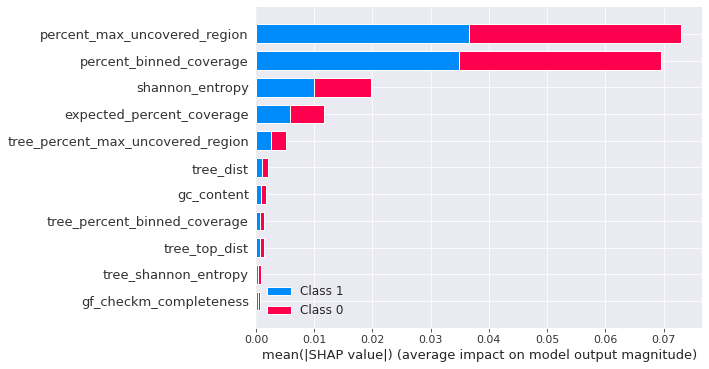

In [15]:
shap.summary_plot(shap_values, X_transf)

In [ ]:
# shap.force_plot(explainer.expected_value[1], shap_values[1][:100], X_transf.iloc[:, :100])

Optimal number of features : 11


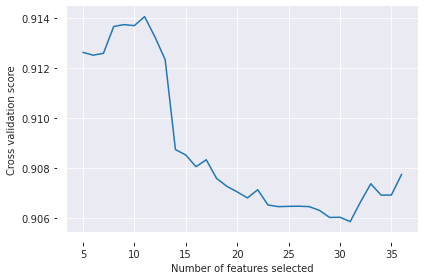

In [17]:
rfecv = clf_model['rfecv']

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
fig, ax = plt.subplots()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(5,
               len(rfecv.grid_scores_) + 5),
         rfecv.grid_scores_)

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

pu.save_plot(fig, f"rfcev.{clf_name}")

In [18]:
from sklearn.metrics import precision_score, recall_score, average_precision_score

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [19]:
X_transf.columns

Index(['percent_binned_coverage', 'expected_percent_coverage',
       'shannon_entropy', 'percent_max_uncovered_region', 'gc_content',
       'tree_dist', 'tree_top_dist', 'gf_checkm_completeness',
       'tree_percent_binned_coverage', 'tree_shannon_entropy',
       'tree_percent_max_uncovered_region'],
      dtype='object')

In [20]:
feature_name = "percent_coverage"

precisions = []
recalls = []
average_precison_scores = []

precisions_log = []
recalls_log = []
average_precison_scores_log = []

y_pred = clf_model.predict(X_test)
y_pred_log = clf_log.predict(X_test[["relative_abundance"]])

thresholds = np.arange(.01, 1., .01)
for threshold in thresholds:
    mask = X_test[feature_name] < threshold
    
    precisions.append(precision_score(y_test[mask], y_pred[mask]))
    recalls.append(recall_score(y_test[mask], y_pred[mask]))
    average_precison_scores.append(average_precision_score(y_test[mask], y_pred[mask]))
    
    precisions_log.append(precision_score(y_test[mask], y_pred_log[mask]))
    recalls_log.append(recall_score(y_test[mask], y_pred_log[mask]))
    average_precison_scores_log.append(average_precision_score(y_test[mask], y_pred_log[mask]))

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


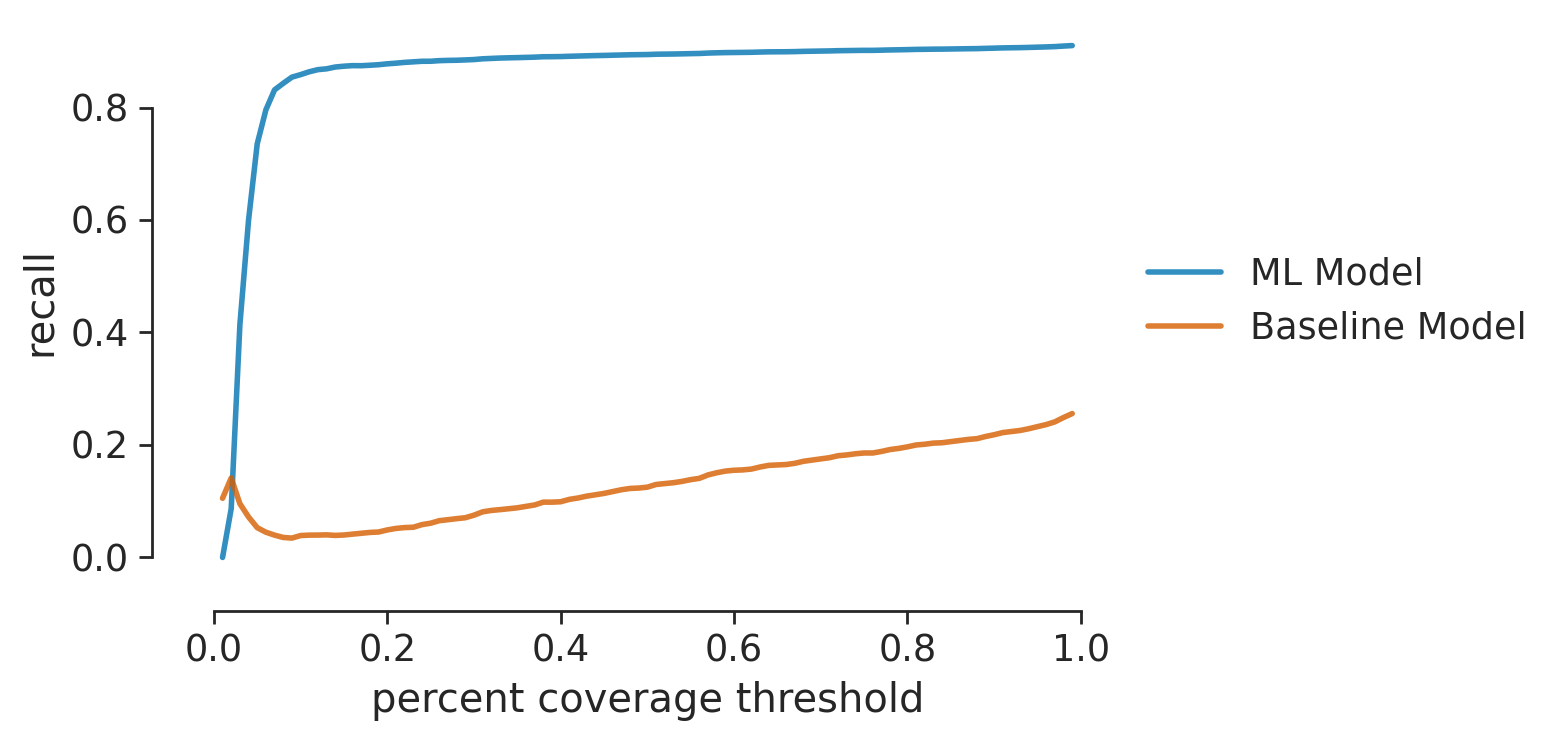

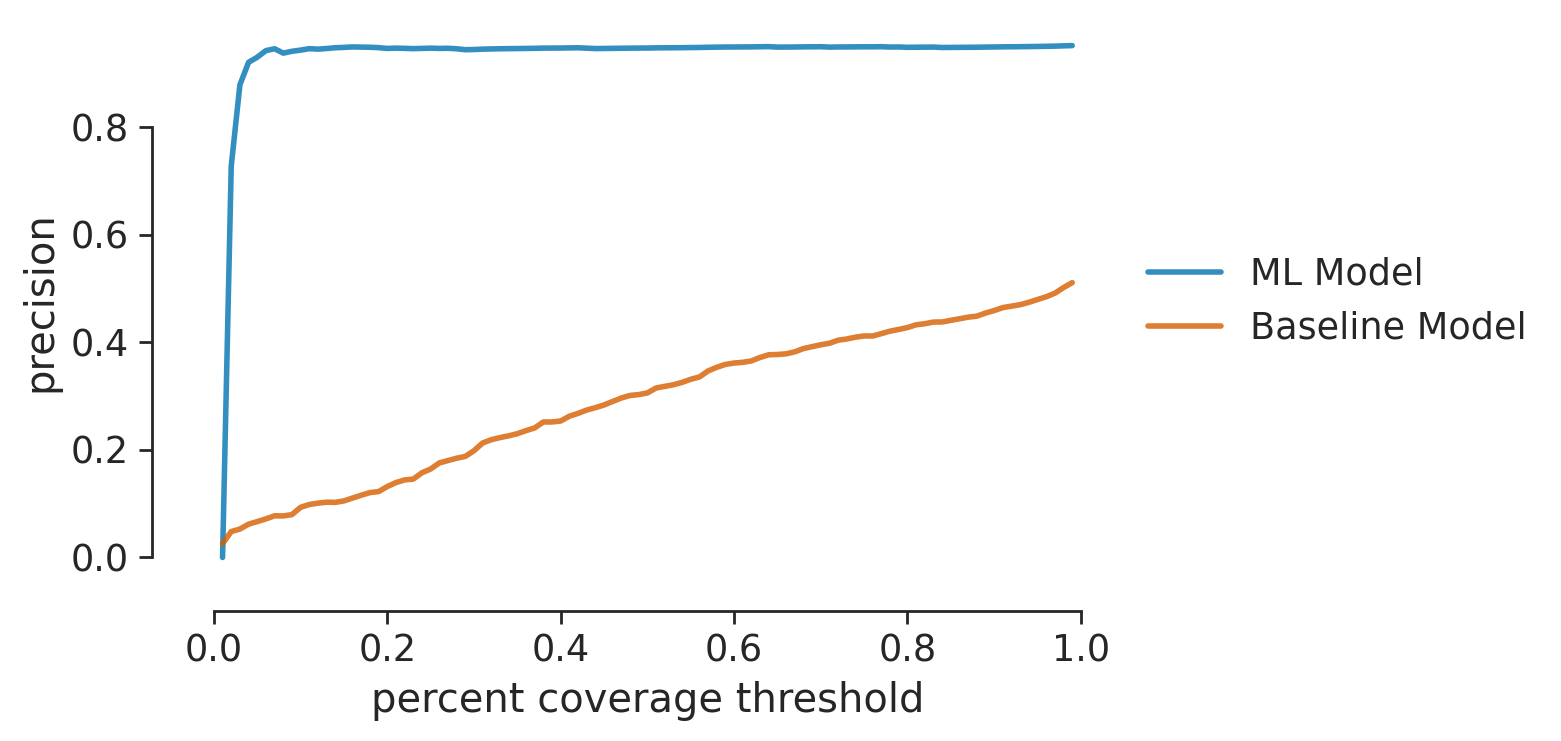

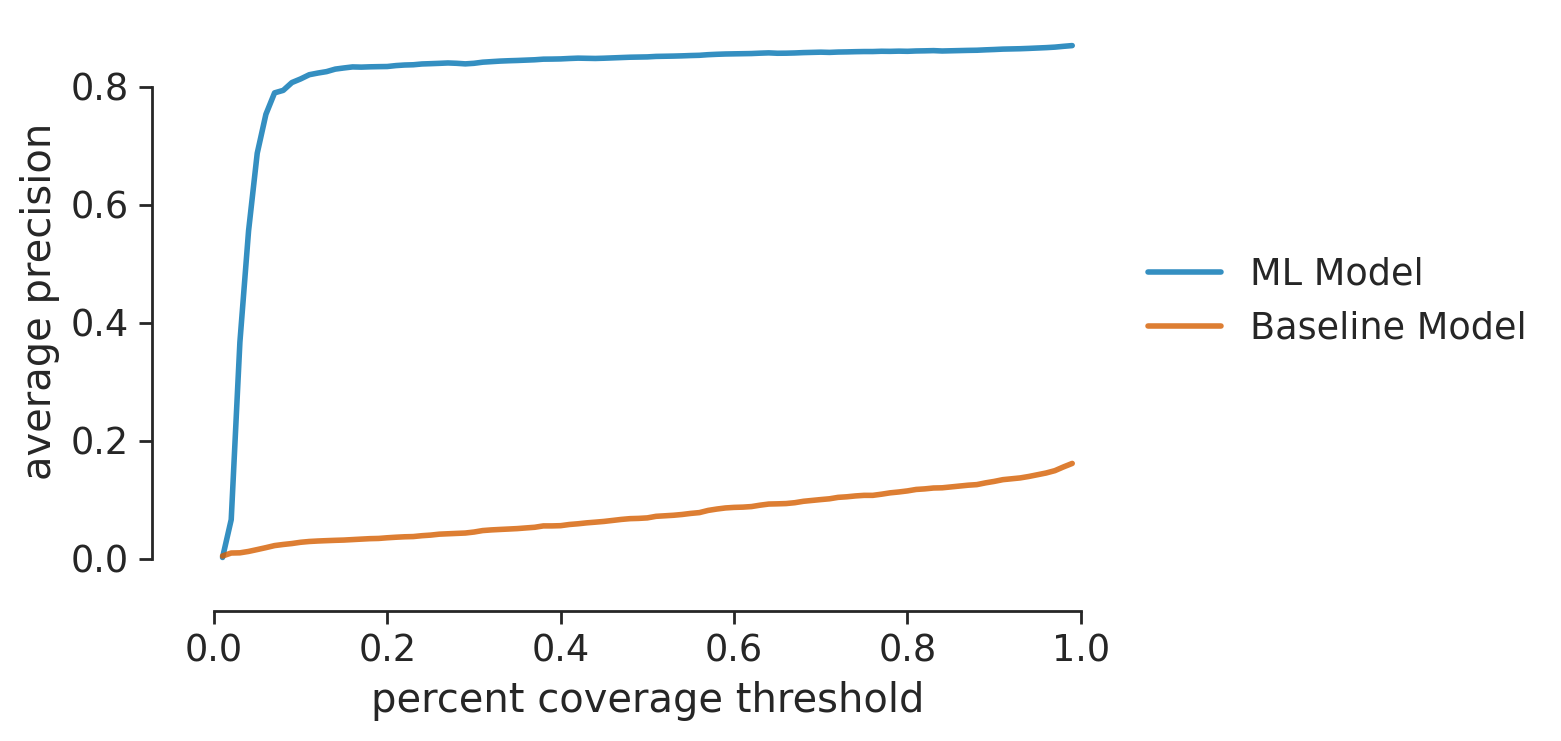

In [21]:
sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())

ax.yaxis.grid(True)
ax.xaxis.grid(False)
fig_size = pu.get_fig_size(15, 10)

latex_feature_name = feature_name.replace("_", " ")

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, recalls, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, recalls_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("recall")
ax.set_xlabel(f"{latex_feature_name} threshold")

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"recall.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, precisions, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, precisions_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"precision.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, average_precison_scores, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, average_precison_scores_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("average precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)
pu.save_plot(fig, f"ap.test.{clf_name}.{feature_name}", artists=(artists,))


In [22]:
feature_name = "relative_abundance"

precisions = []
recalls = []
average_precison_scores = []

precisions_log = []
recalls_log = []
average_precison_scores_log = []

y_pred = clf_model.predict(X_test)
y_pred_log = clf_log.predict(X_test[["relative_abundance"]])

thresholds = np.arange(.01, 1., .01)
for threshold in thresholds:
    mask = X_test[feature_name] < threshold
    
    precisions.append(precision_score(y_test[mask], y_pred[mask]))
    recalls.append(recall_score(y_test[mask], y_pred[mask]))
    average_precison_scores.append(average_precision_score(y_test[mask], y_pred[mask]))
    
    precisions_log.append(precision_score(y_test[mask], y_pred_log[mask]))
    recalls_log.append(recall_score(y_test[mask], y_pred_log[mask]))
    average_precison_scores_log.append(average_precision_score(y_test[mask], y_pred_log[mask]))

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


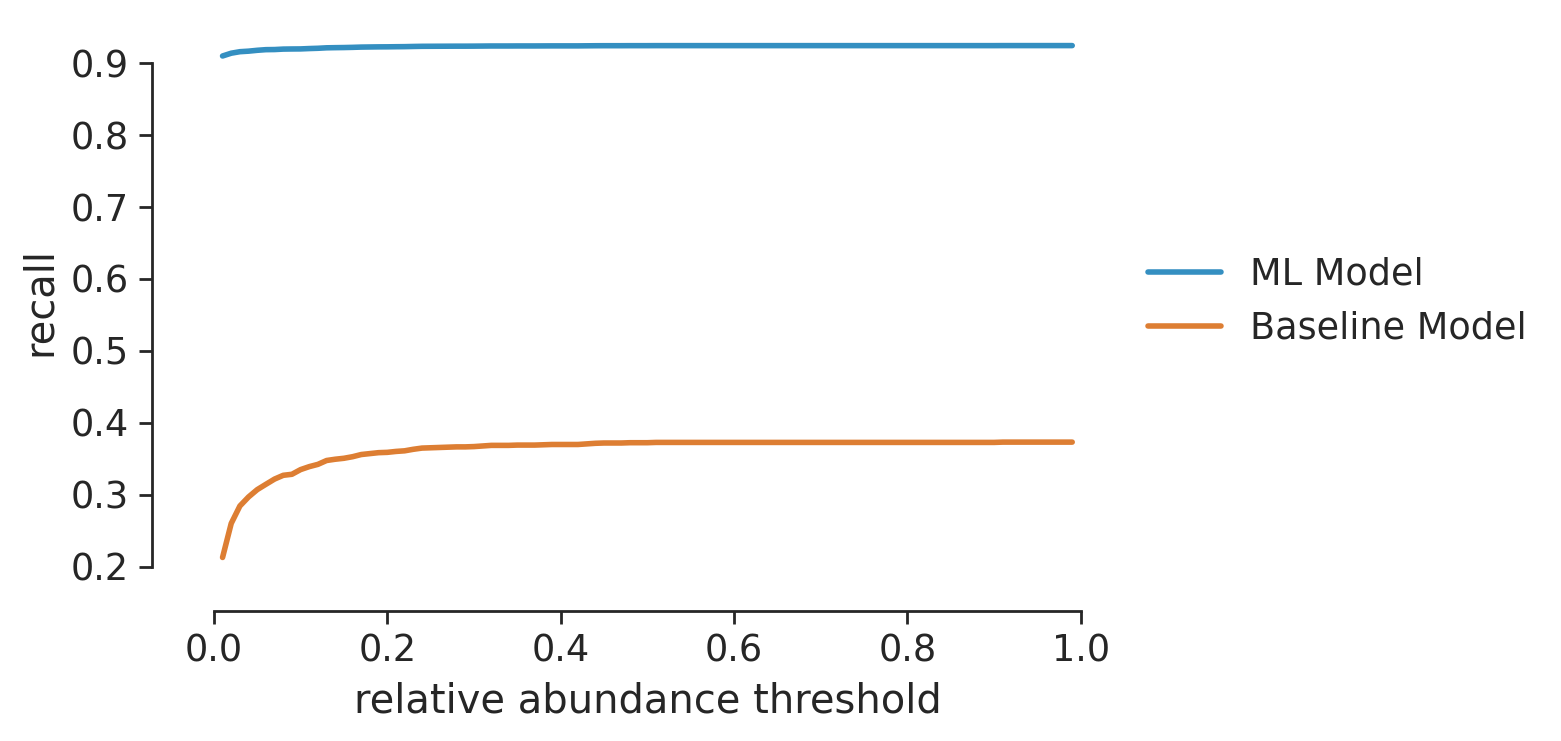

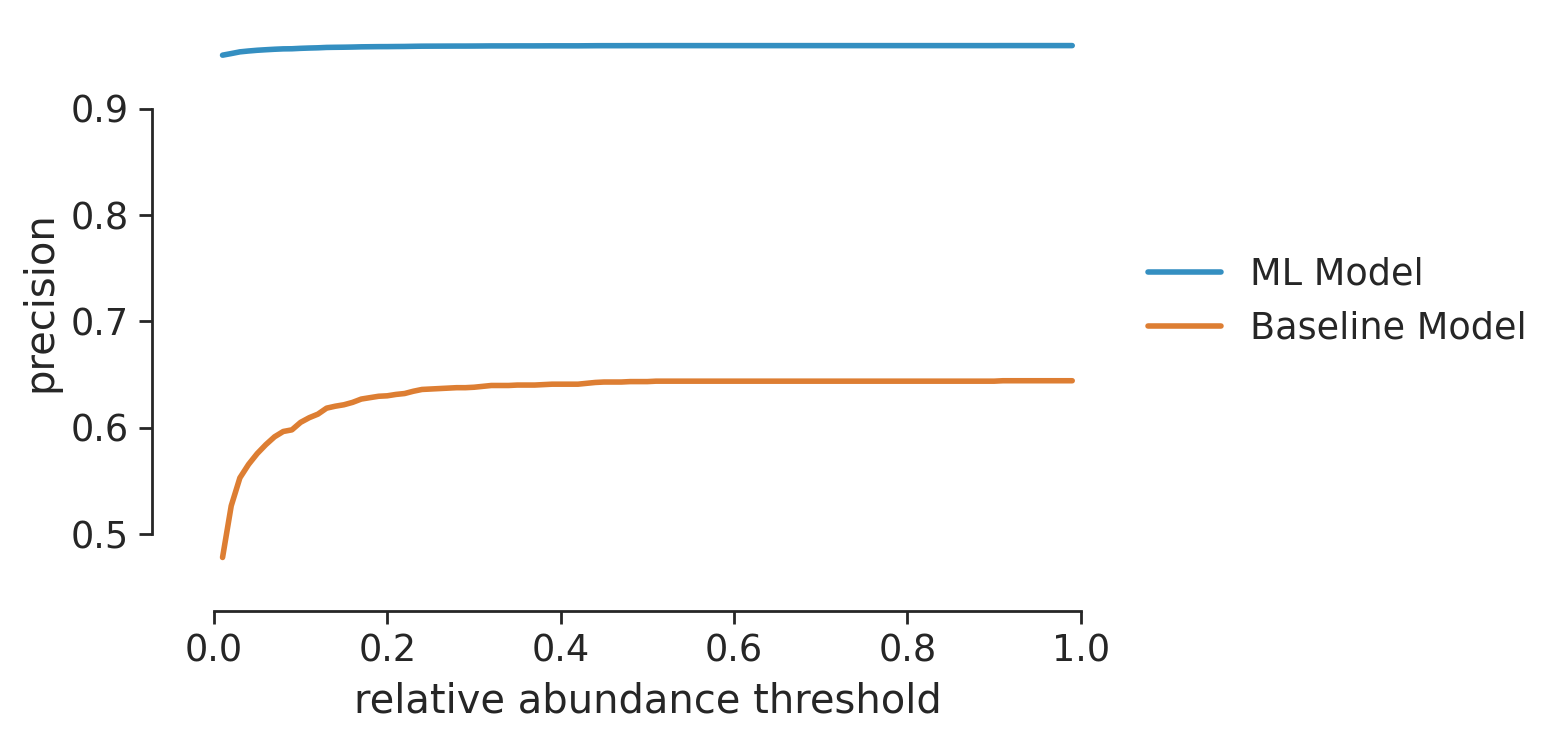

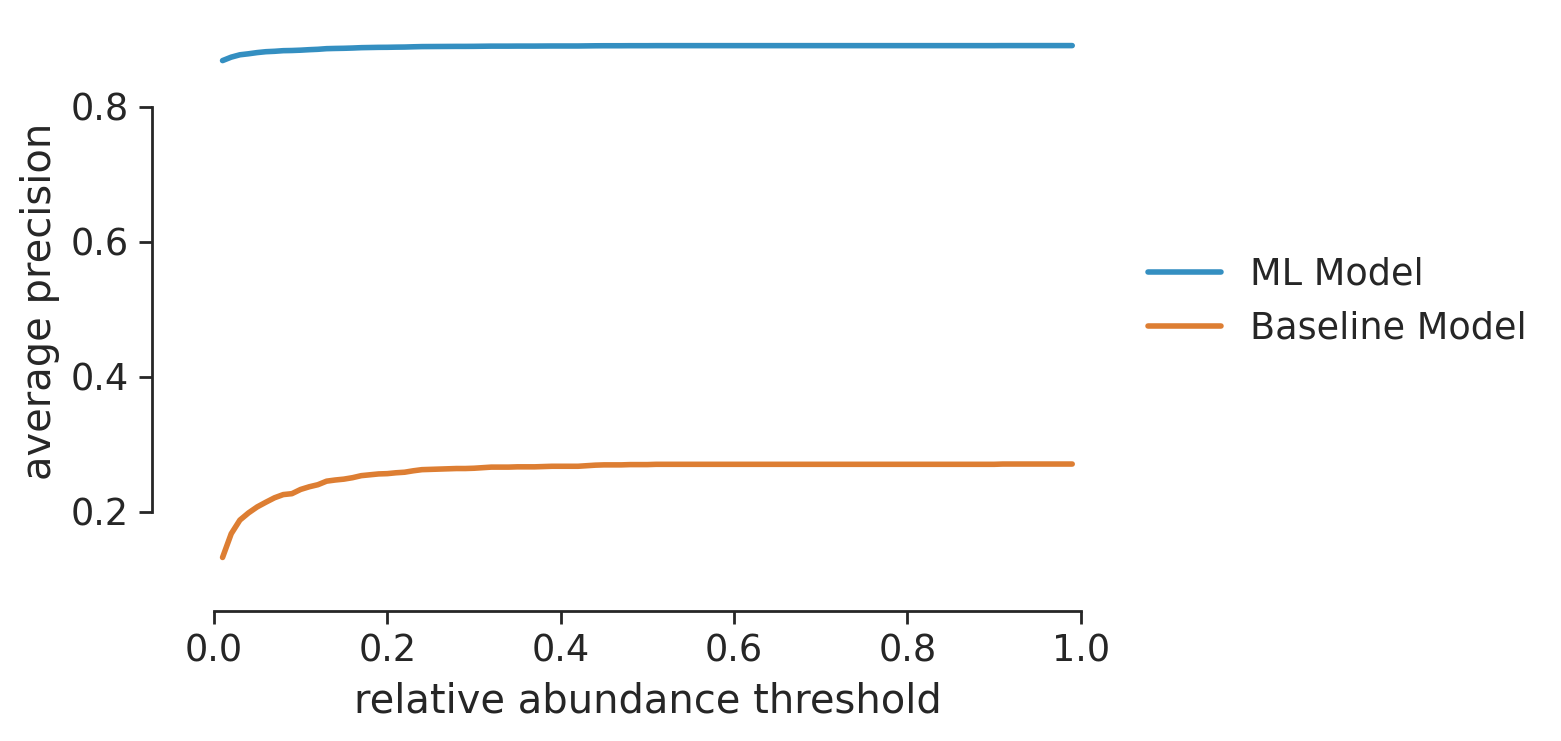

In [23]:
sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())

ax.yaxis.grid(True)
ax.xaxis.grid(False)
fig_size = pu.get_fig_size(15, 10)

latex_feature_name = feature_name.replace("_", " ")

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, recalls, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, recalls_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("recall")
ax.set_xlabel(f"{latex_feature_name} threshold")

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"recall.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, precisions, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, precisions_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)

pu.save_plot(fig, f"precision.test.{clf_name}.{feature_name}", artists=(artists,))

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(thresholds, average_precison_scores, color="b", alpha=.8, lw=2, label="ML Model")
ax.plot(thresholds, average_precison_scores_log, color="r", alpha=.8, lw=2, label="Baseline Model")

ax.set_ylabel("average precision")
ax.set_xlabel((f"{latex_feature_name} threshold"))

pu.stylize_axes(ax)
pu.stylize_fig(fig)
plt.tight_layout()

artists = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
artists.set_frame_on(False)
pu.save_plot(fig, f"ap.test.{clf_name}.{feature_name}", artists=(artists,))

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


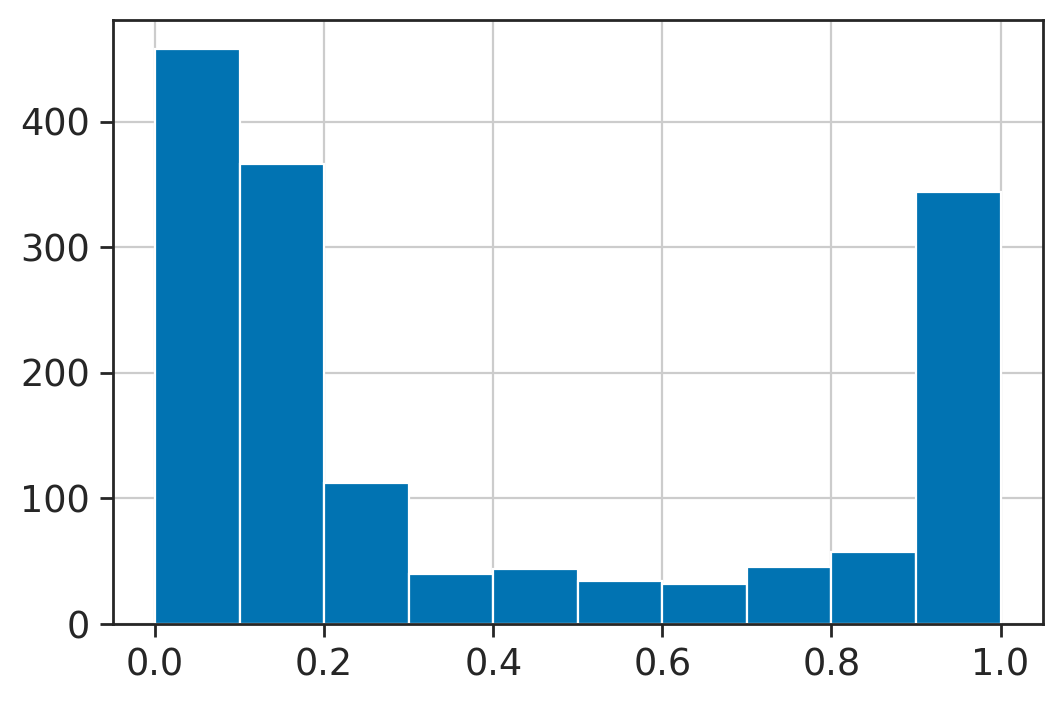

In [24]:
fig, ax = plt.subplots()
X_transf.loc[y_test.values, "percent_binned_coverage"].hist(ax=ax)
pu.save_plot(fig, "percent_binned_coverage.hist")

In [ ]:
# shap_obj = explainer(X_transf)

In [ ]:
# shap.plots.beeswarm(shap_obj)

In [ ]:
X_transf.columns

In [ ]:
import matplotlib

matplotlib.rcParams['text.usetex']=False
# matplotlib.rcParams['text.latex.unicode']=True

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


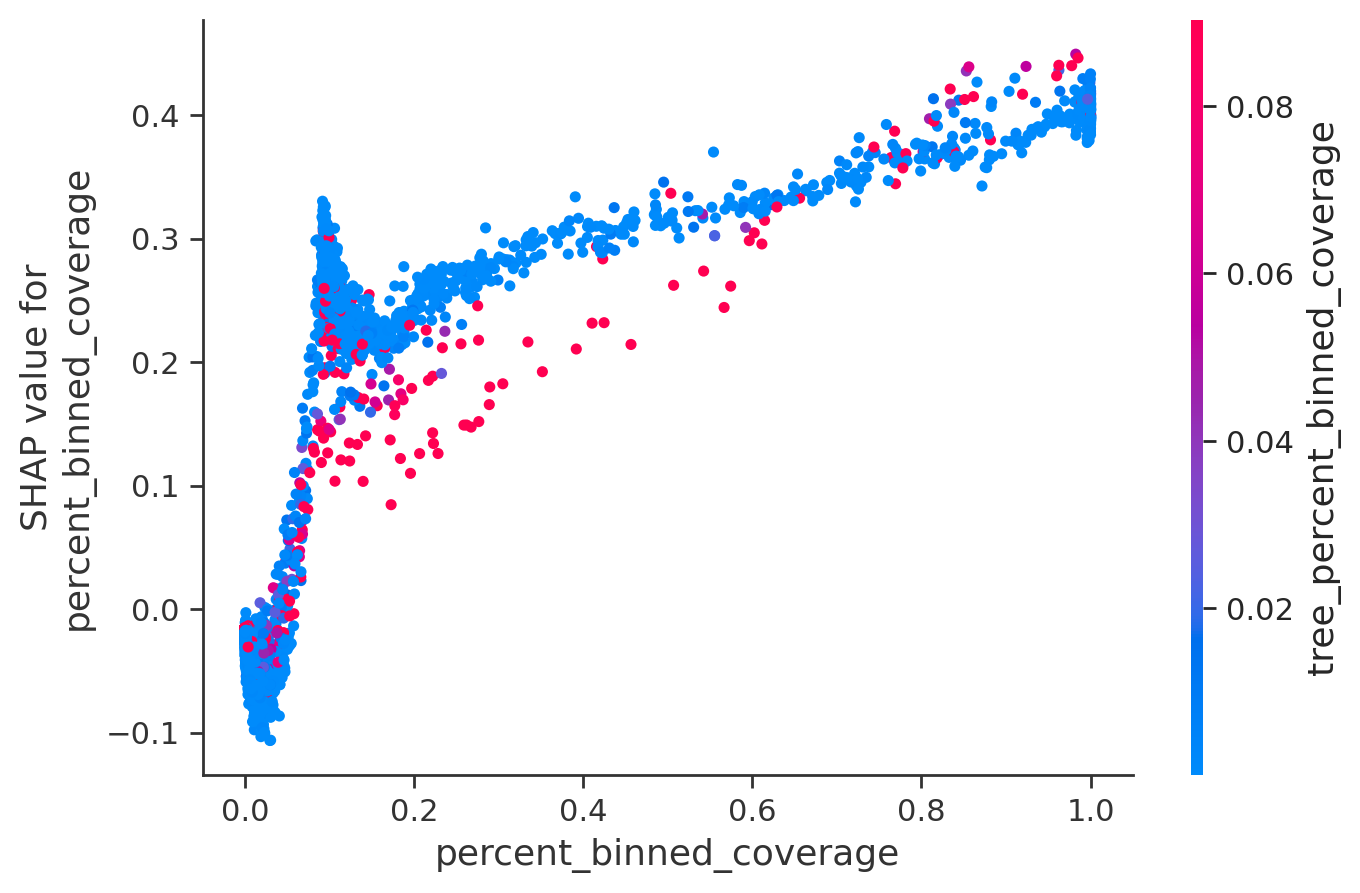

In [25]:
shap.dependence_plot("percent_binned_coverage", shap_values[1], X_transf, interaction_index = "tree_percent_binned_coverage")

In [ ]:
shap.dependence_plot("expected_percent_coverage", shap_values[1], X_transf)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
# shap.dependence_plot("percent_binned_coverage", shap_values[1], X, interaction_index = "relative_abundance")

In [ ]:
# for name in X.columns:
#     shap.dependence_plot(name, shap_values[1], X)